# Rachel Ward - AIM 5010 - M1 Assignment

## Introduction

In this assignment I will be preprocessing a dataset on hotel bookings from [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand). 

According to Kaggle, the dataset contains booking information for two different hotels (a city hotel and a resort hotel). This includes information regarding when the booking was made, the length of stay, the types and numbers of guests, the number of available parking spaces, and other booking related information. 

To accomplish this I will perform the following steps:
- **Data Profile & Domain Knowledge Development** - this includes developing some domain knowledge for each of the variables in order to better understand the dataset 
- **Exploratory Data Analysis ("EDA")** - this includes analyzing the nature of each variable, checking for missing data, investigating any data integrity issues, and examining any outliers
- **Data Preparation** - this may include imputation of missing values, transformations to outliers, scaling, or other relevant data transformations as necessary
- **Prepped Data Review** - this includes performing another EDA on my attributes after my data preparation to see how the nature of the variables changed

## Data Profile & Domain Knowledge Development
From Kaggle, I know that the dataset contains 32 variables. The following descriptions come from the Kaggle dataset description.

- **hotel** - indicates the type of hotel(H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled** - is a binary variable indicating if the booking was canceled (1) or not (0)
- **lead_time** - number of days that elapsed between the entering date of the booking into the Property Management System ("PMS") and the arrival date
- **arrival_date_year** - year of arrival date
- **arrival_date_month** - month of arrival date
- **arrival_date_week_number** - week number of the year for the arrival date
- **arrival_date_day_of_month** - day of the month of the arrival date
- **stays_in_weekend_nights** - number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights** - number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults** - number of adults
- **children** - number of children
- **babies** - number of babies
- **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
- **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent** - ID of the travel agency that made the booking
- **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type** - Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces** - Number of car parking spaces required by the customer
- **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status** - Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

Now that I have a basic understanding of what each of the variables represents, I will proceed with my exploratory data analysis.

## Exploratory Data Analysis

In this step I will analyze the nature of each of the attributes, check for missing data, investigate any data integrity issues, and examine outliers. I will first read in the file, check the data types for each column, and check for missing values.

In [1]:
#first import the libraries I will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#now read in the file; from looking at the dataset there are no headers
filename = "https://raw.githubusercontent.com/rachelward617/AIM-5010/master/hotel_bookings.csv"
bookings = pd.read_csv(filename)

#display all columns
pd.set_option('display.max_columns', None) 

#check results
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
#check the data types for each column
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

From the above, I see that the variable **hotel** is an object. From domain knowledge I know that there should only be two possibilities for this column, so I will transform this later to a binary indicator variable.

Furthermore, I see that **arrival_date_month** is an object, while all the other date related fields are integers. I will also transform this column to integer values.

I see that **children** is a float rather than an integer. Since it's physically impossible to have only a part of a child (i.e. 1.4 children is not possible), I will transform this column to be an integer. 

There are multiple other variables which are objects which will need to be one-hot-encoded in order to be used in most machine learning algorithms.

The **reservation_status_date** will also need to be adjusted to a date field after importing the datetime library.

In [3]:
#check the data set for missing (null) values
bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

From the above I see that the only variables with missing values are **children**, **country**, **agent**, and **company**. In the context of this dataset, it makes sense that both agent and company would be blank sometimes, as a lot of times individuals make their own reservations without using a travel agent or having a company pay for their hotel stay. For these missing values I will likely enter a new ID which is not currently in use (i.e. a 99999) to clearly delineate that this was a missing data point. For the 4 rows missing children data, I will likely delete them since 4 rows is a tiny proportion of this dataset. Now I will get summary statistics for the numerical variables in order to identify any obvious data integrity issues. 

In [4]:
#get summary statistics for each column
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


From the above summary statistics I note the following:
- **is_canceled** - the values range from 0 to 1 which is as expected from our domain knowledge
- **lead_time** - the values from range from 0 to 737 days, since this is measured in days, it is possible that someone booked a hotel stay more than two years in advance, especially if it was around a big event (SuperBowl, World Cup, etc.), so I will need to look at a visualization to determine the best course of action for this outlier
- **arrival_date_year** - the values here range from 2015 to 2017, which is acceptable (i.e. there are no future years or negative years)
- **arrival_date_week_number** - the values here range from 1 to 53. While 53 may appear to be invalid since we typically think of 52 weeks in a year, it is possible to have a week 53 if the year does not start on a Sunday and you count the partial week as the first week of the year
- **arrival_date_day_of_month** - the values range from 1 to 31, which are valid (no negative, nothing greater than 31)
- **stays_in_weekend_nights** - the values range from 0 to 19, the 19 could be explained by an extremely long stay, but it warrants further investigation to make sure that the length of the entire stay is long enough to allow for 19 weekend nights
- **stays_in_week_nights** - the values range from 0 to 50, which may be valid as some people travel for extended periods, especially for business
- **adults** - the values range from 0 to 55; since most hotel rooms hold 2 - 4 adults, it seems unlikely that there were 55 adults in one room, however it is possible that this was part of a group booking so it warrants further investigation
- **children** - the values range from 0 to 10; similar to adults it is unlikely that one room could fit 10 children, however it is possible that it is part of a group booking and so therefore warrants further investigation
- **babies** - the values range from 0 to 10; similar to adults and children, it is unlikely that one room could fit 10 babies, however it is possible that it is part of a group booking and so therefore warrants further investigation
- **is_repeated_guest** - the values range from 0 to 1 as expected
- **previous_cancellations** - the values range from 0 to 26; while 26 may seem high, this may be valid since an individual could theoretically change their plans many times, or have business trips cancelled and rescheduled
- **previous_bookings_not_cancelled** - the values range from 0 to 72; while 72 may seem high, again this could be an individual who repeatedly travels for business (or to see family) and stays at the same hotel
- **booking_changes** - the values range from 0 to 21; which is a similar maximum to what we see in previous_cancellations
- both **agent** and **company** are irrelevant in terms of statistics, as they are ID's, they are not real numerical variables
- **days_in_waiting_list** ranges from 0 to 391; it seems unlikely that the hotel kept a customer waiting over a year before providing confirmation but it could be possible that it was for a booking on a very busy weekend and the hotel had to wait for a cancellation, so this warrants further investigation
- **adr** - this ranges from -6 to 5400; the negative value definitely seems to be invalid, but the 5400 could be related to a group rate for a block of rooms, so it warrants further investigation
- **required_car_parking_spaces** - this ranges from 0 to 8 which seems reasonable if the assumption made above that there is an observation related to a group is correct
- **total_of_special_requests** - this ranges from 0 to 5 which is in line with the data profile available from Kaggle.

Now that I have an idea of a few data integrity issues, I will look at the distributions of each of the variables. I will split this portion into numeric data for which I will plot histograms, and categorical data for which I will plot bar plots.

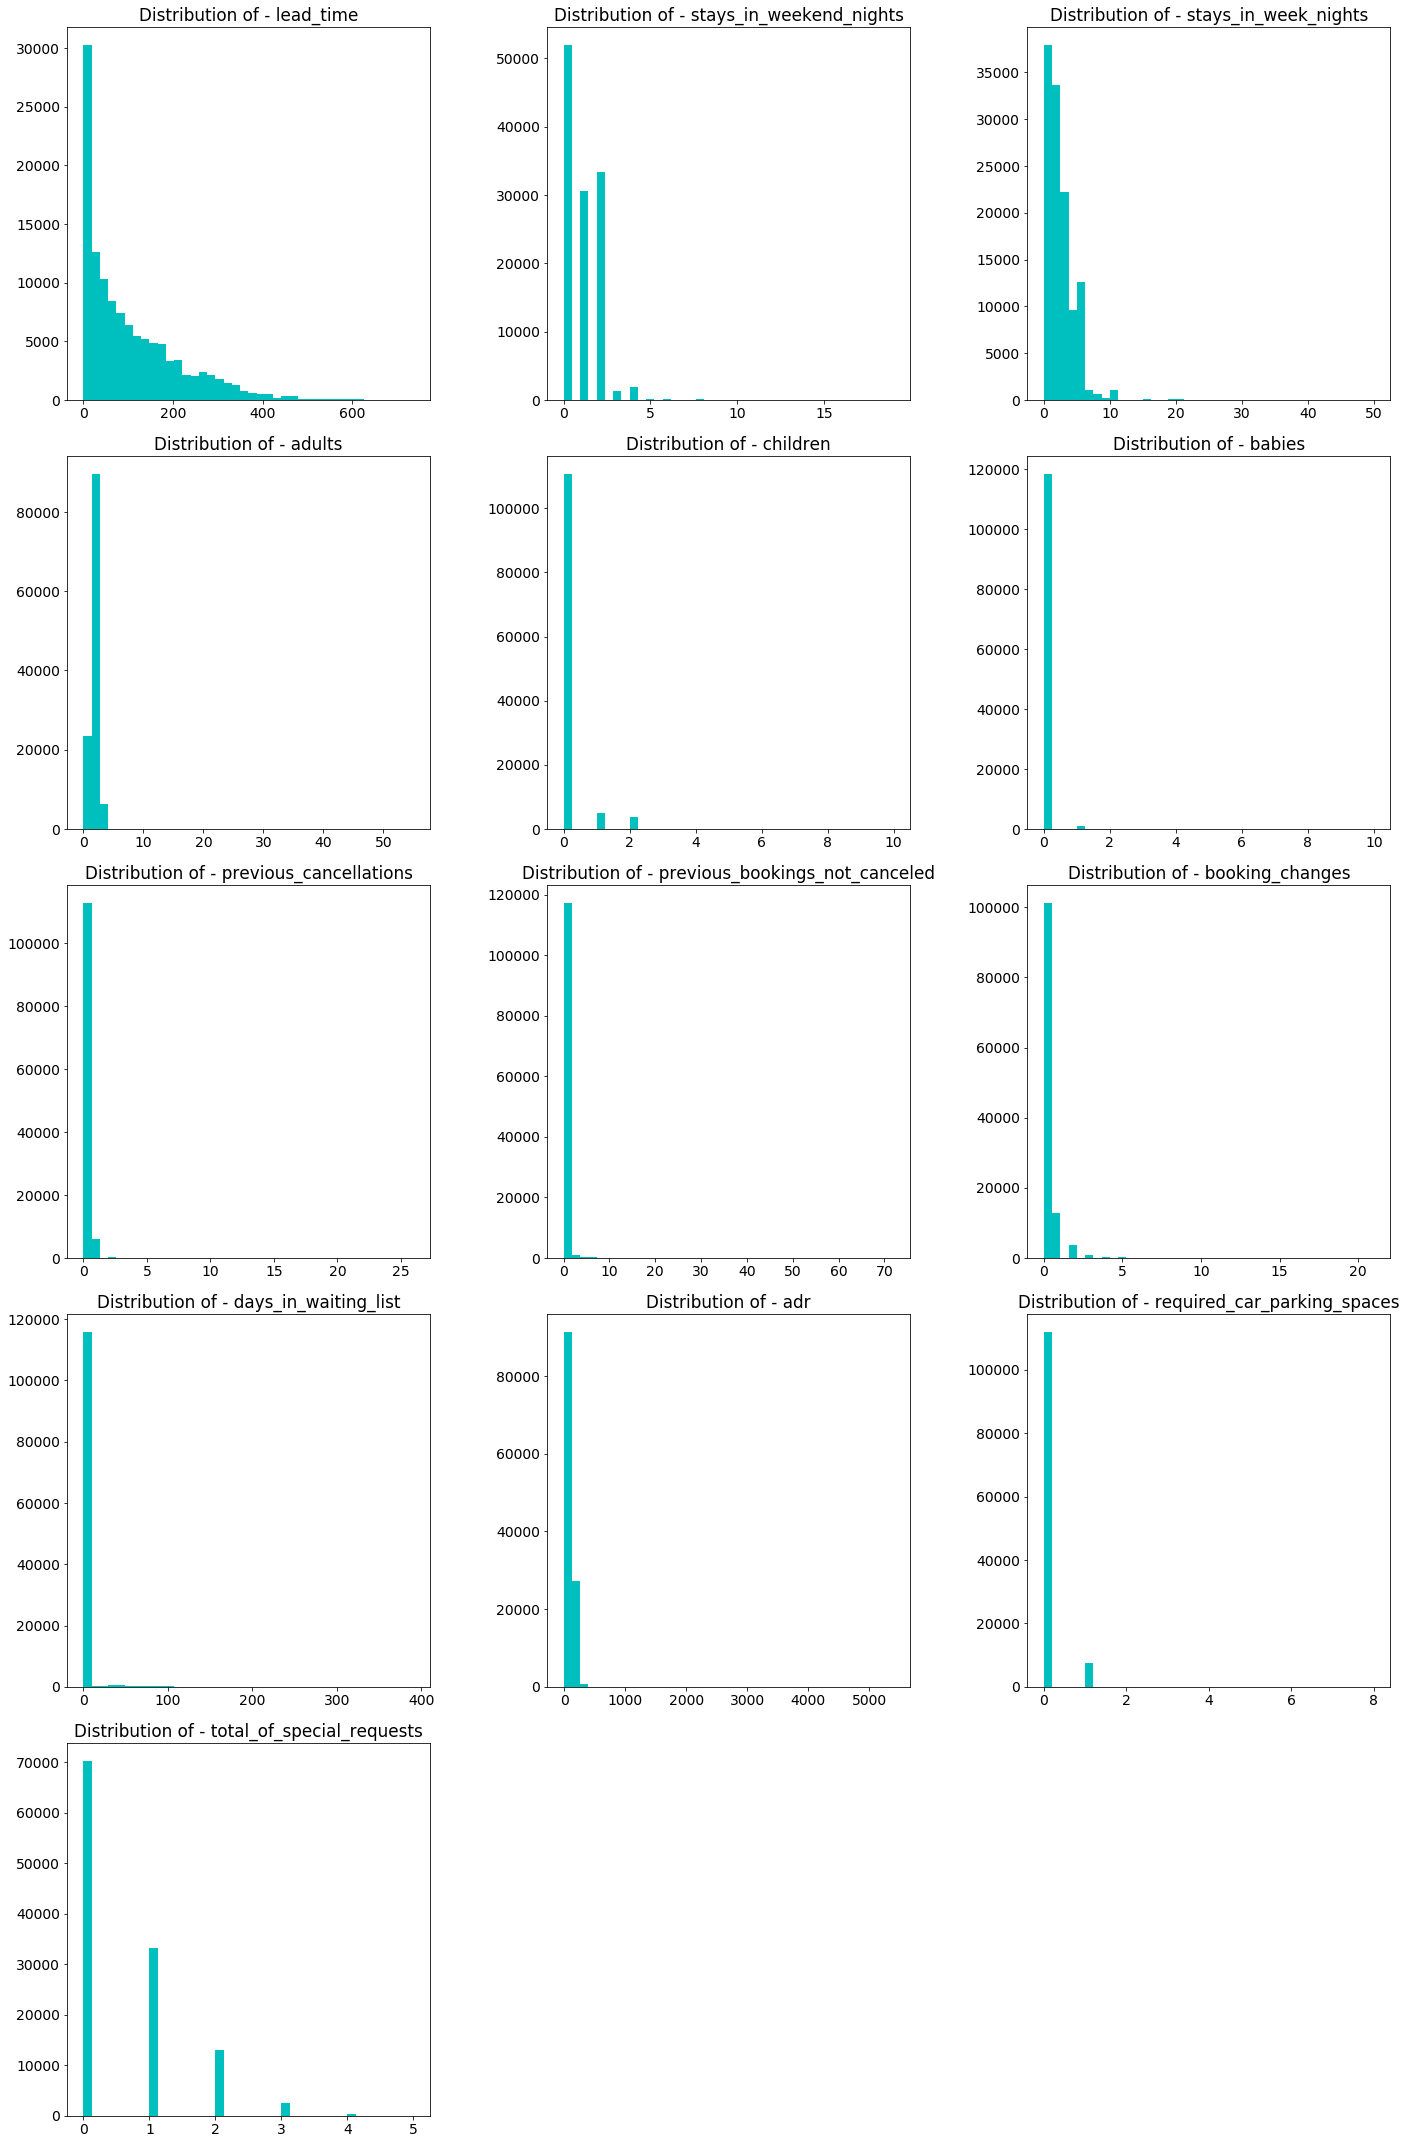

In [5]:
sns.set_palette("muted")

#create a list of the numeric variables
bookings_num = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies', 
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
                'adr', 'required_car_parking_spaces', 'total_of_special_requests']

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1

#plot a histogram for each of our numeric variables
for k in bookings_num :   
    plt.subplot(5,3,j) 
    plt.hist(bookings[k], bins=40, color='c')
    plt.title('Distribution of - {}'.format(k))
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

The above visualizations confirm that there are likely outliers in at least a few of the variables, to be sure of this, I will plot boxplots of the data later on. First I will look at the bar plots of the categorical variables to see if there is anything to be further concerned about. 

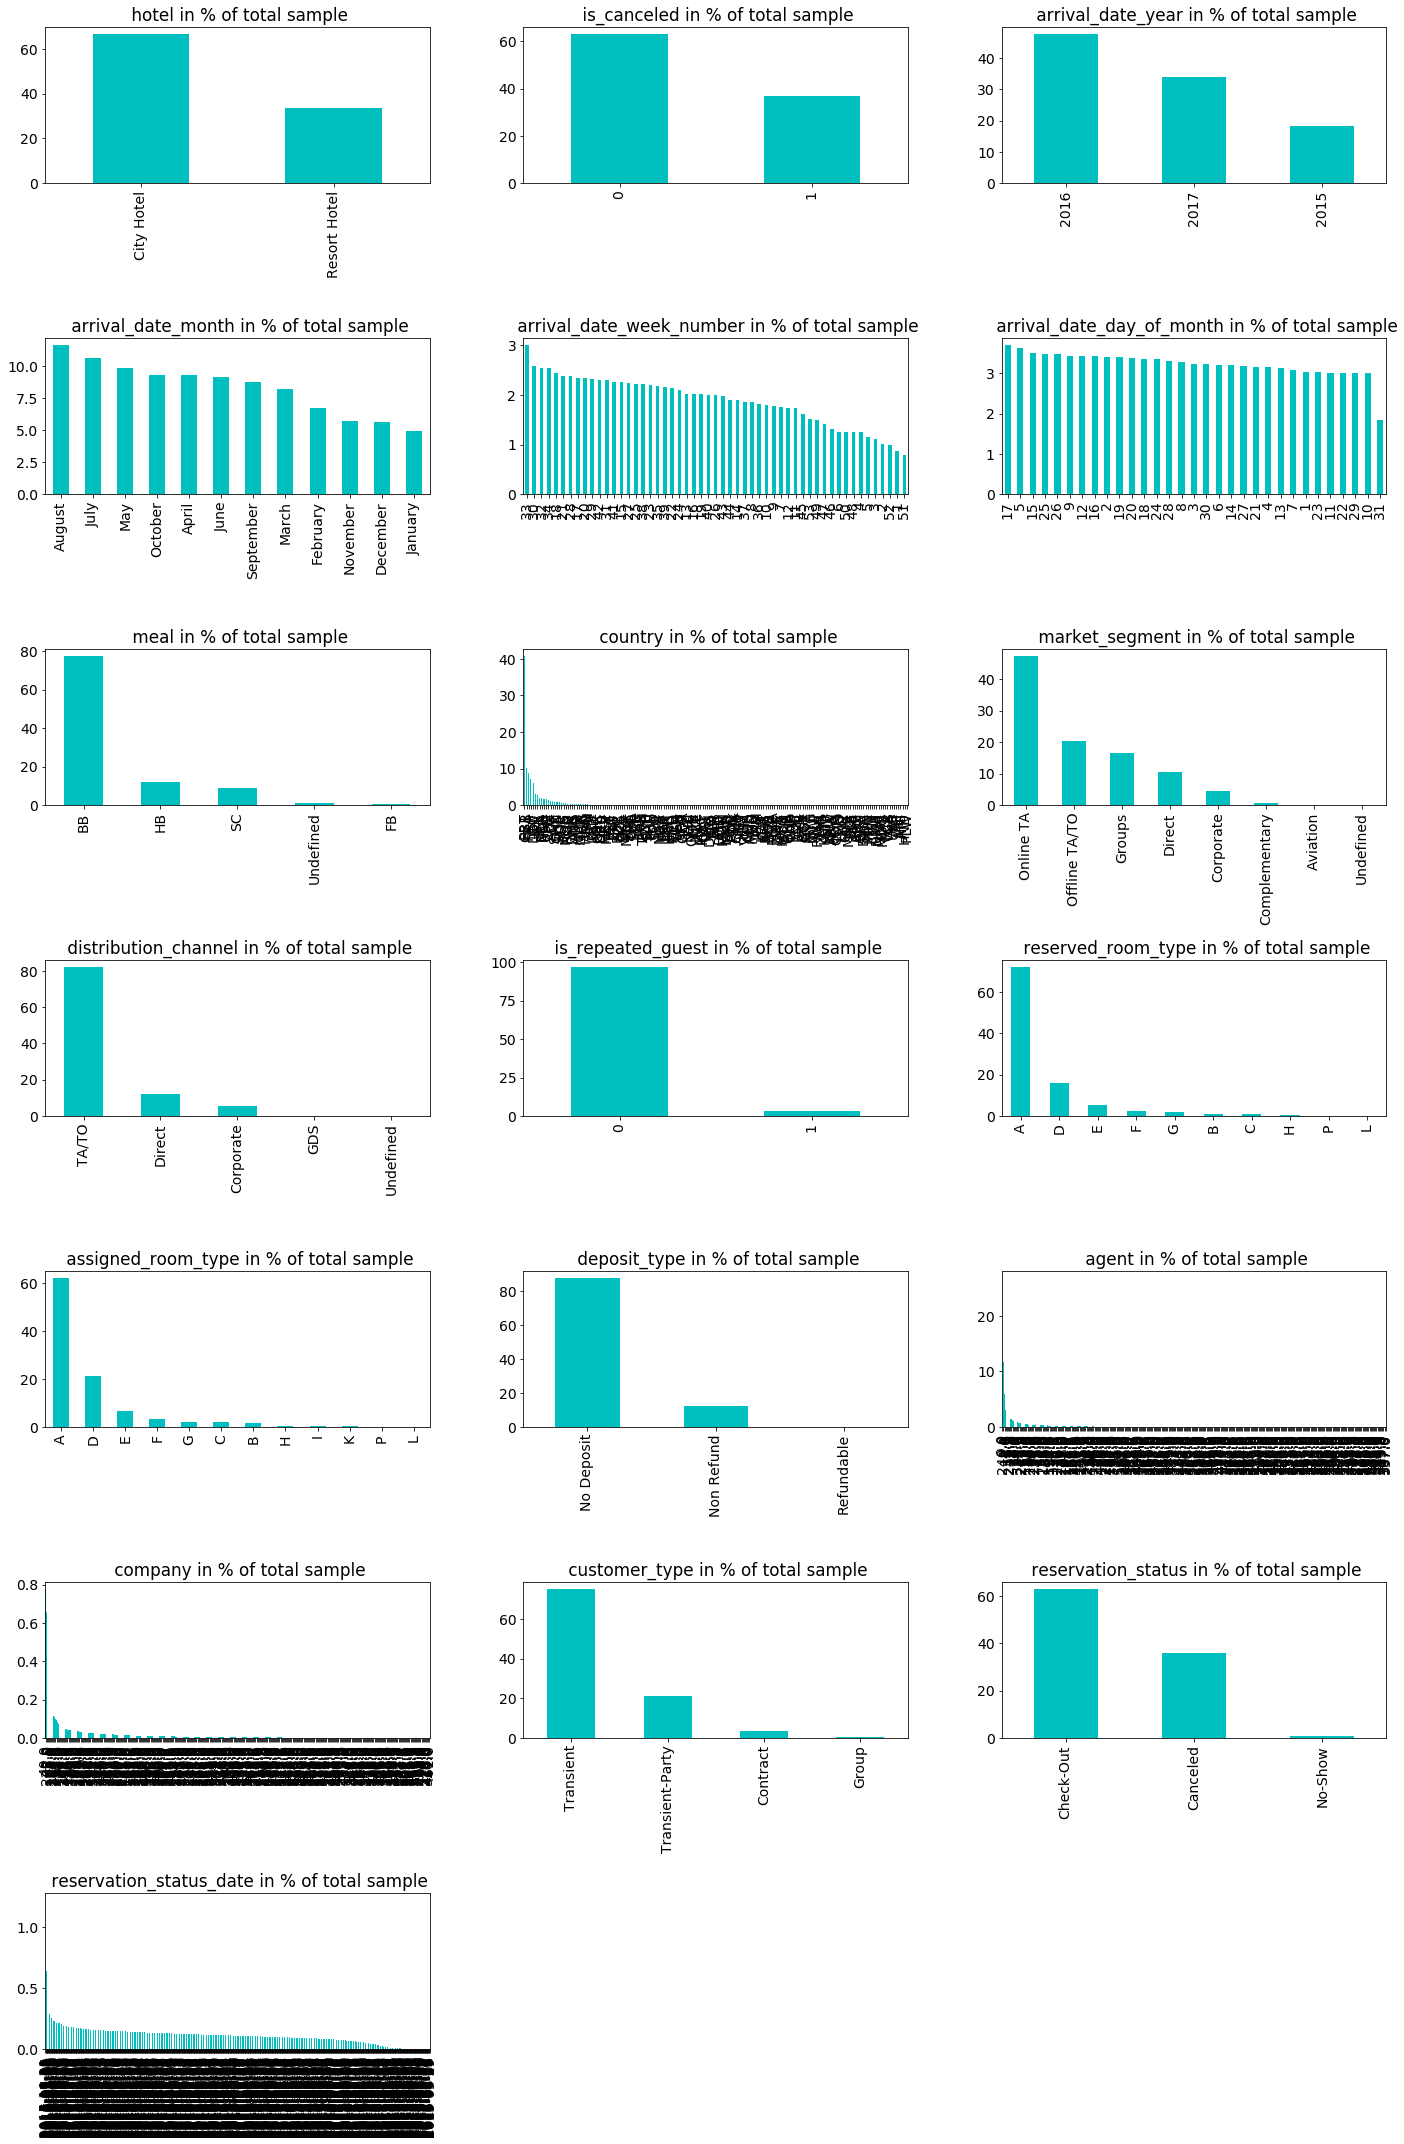

In [6]:
#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#create a list of the categorical variables
bookings_cat = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'distribution_channel', 
                'is_repeated_guest','reserved_room_type', 'assigned_room_type', 'deposit_type', 
                'agent', 'company', 'customer_type', 'reservation_status', 'reservation_status_date']

#use an index to identify the spot of the subplot
j=1
#plot a bar chart for each categorical variable, as % of total 
for k in bookings_cat:
    plt.subplot(7,3,j) 
    ((bookings[k].value_counts()/len(bookings[k]))*100).plot(kind='bar', color = 'c');
    plt.title(' {} in % of total sample'.format(k))
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

The bar plots show that a few of the variables, such as **reservation_status_date** and **company** have a lot of categories, so many, in fact, that the axis is illegible. They also show us that transient was the most frequent customer type, and that the vast majority (close to 100%) are not repeated guest. If I were a marketing person, that point would be particularly interesting to me as it is widely accepted that there is a large cost associated with obtaining a new customer. 

There are also a few variables which have sparse categories, which could be combined to a category called "other." These are **meal**, **country**, **market_segment**, **distribution_channel**, **reserved_room_type**, **assigned_room_type**, and **customer_type**. 

I also note that there are a few variables with imbalanced classes. I will not address this specifically because it would depending on what type of algorithm would be used, and what the target variable was. If necessary, the data scientist may wish to use a technique such as SMOTE to ensure that each type is properly represented.

Now I will graph boxplots of the numeric variables to confirm my suspicions regarding outliers.

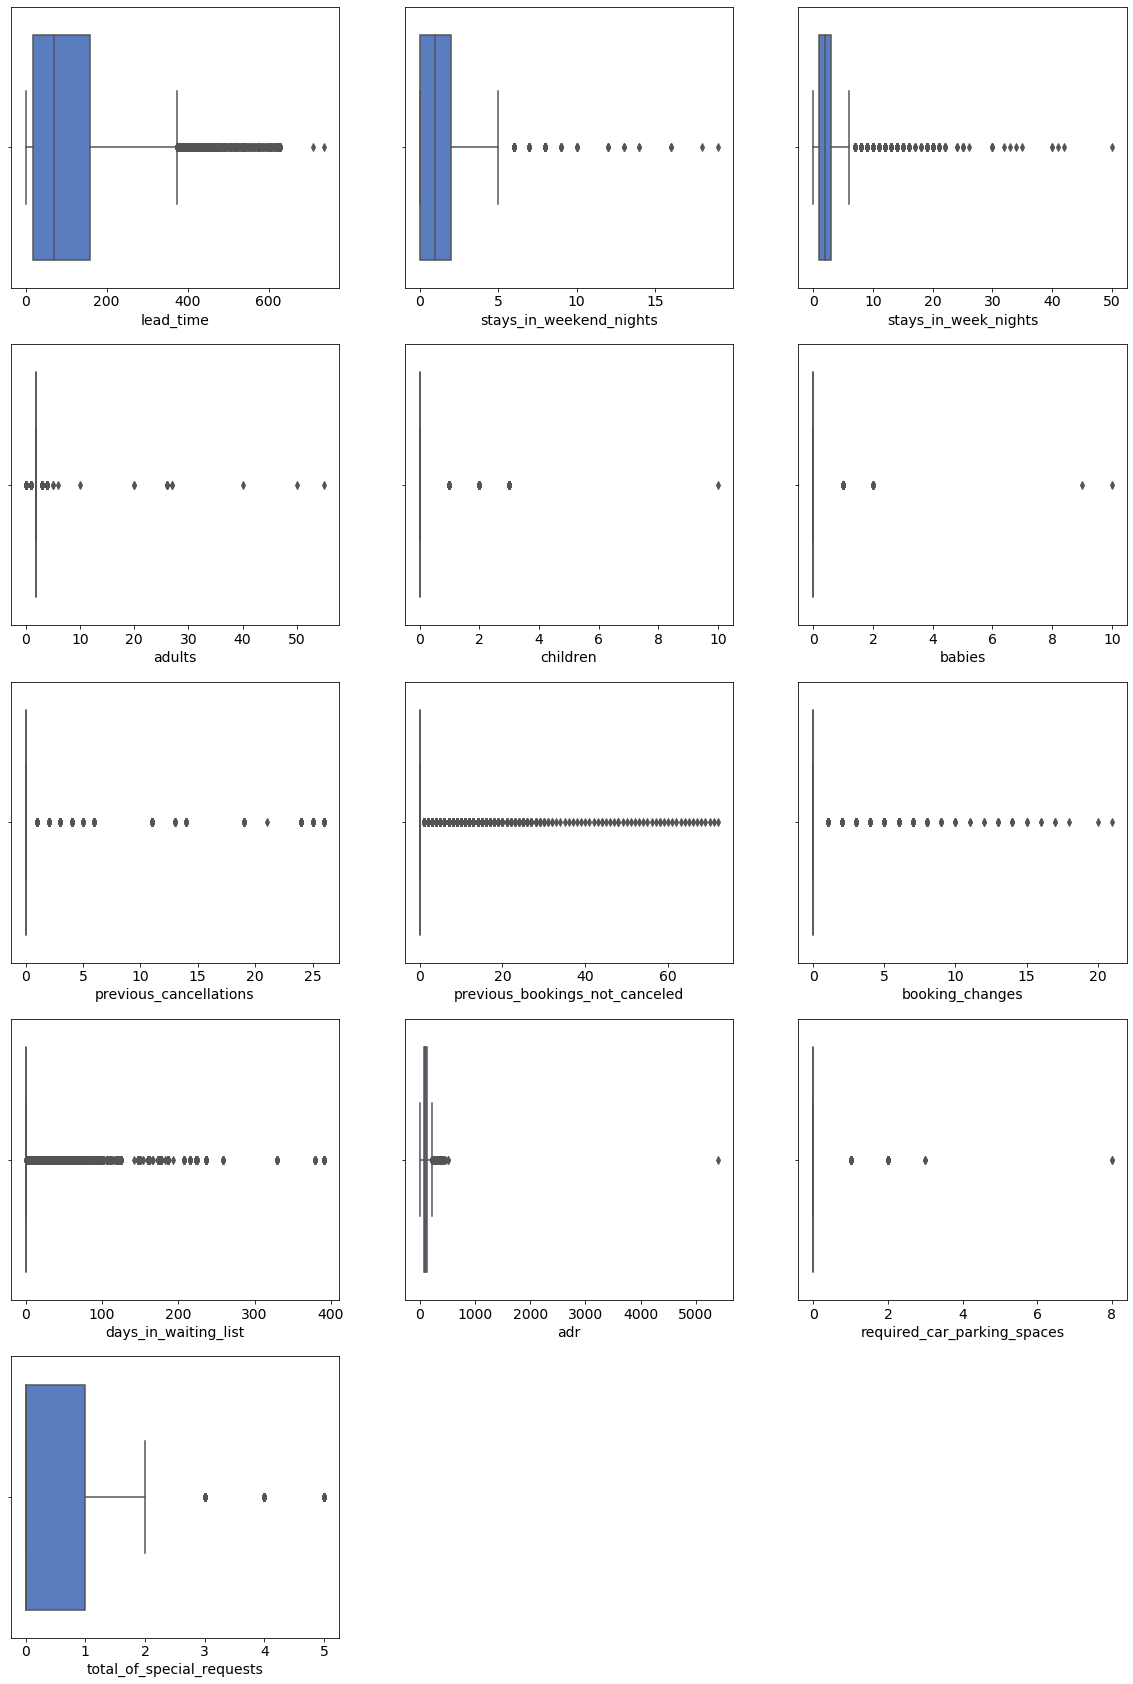

In [7]:
#define a figure to which I will add a boxplot for each of the attributes
plt.figure(figsize=(20,30))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1

for k in bookings_num:  #for each numeric variable graph a boxplot 
    plt.subplot(5,3,j) 
    sns.boxplot(x=k, data=bookings);
    j=j+1

#show results    
plt.show()

I see from the boxplots that there are a number of variables with a lot of outliers. I will now see how many outliers are present for each variable and make a determination as to which outliers (if any) I want to remove.

In [8]:
#create a copy of the data frame
new_df_pos=bookings.copy() 

print('Current shape',bookings.shape) #show shape of dataframe before

#use a for loop to iterate through the columns and count outliers
for k in bookings_num:
    IQ3=new_df_pos[k].quantile(0.75)
    IQ1=new_df_pos[k].quantile(0.25)
    IQR=(IQ3-IQ1)*1.5
    print('number of outliers for the variable %s:' %k, new_df_pos.shape[0]-new_df_pos[((new_df_pos[k]>=(IQ1-IQR)) & (new_df_pos[k]<=(IQ3+IQR))) | (new_df_pos[k].isnull())].shape[0])

Current shape (119390, 32)
number of outliers for the variable lead_time: 3005
number of outliers for the variable stays_in_weekend_nights: 265
number of outliers for the variable stays_in_week_nights: 3354
number of outliers for the variable adults: 29710
number of outliers for the variable children: 8590
number of outliers for the variable babies: 917
number of outliers for the variable previous_cancellations: 6484
number of outliers for the variable previous_bookings_not_canceled: 3620
number of outliers for the variable booking_changes: 18076
number of outliers for the variable days_in_waiting_list: 3698
number of outliers for the variable adr: 3793
number of outliers for the variable required_car_parking_spaces: 7416
number of outliers for the variable total_of_special_requests: 2877


From above and from doing some simple research, it seems we should eliminate observations where the lead time was greater than 365 days, where the adr was less than 0, where the stay in weekend nights was greater than 5, and where the stay in weeknights was greater than 10. This should leave us with a sufficient amount of data (i.e. not remove too many rows) while also removing outliers from important columns which could skew our results. 

## Data Preparation

In this section I will address the issues identified above in order to prepare the data for use in a machine learning model.

### Data Preparation - Data Type Transformations

First I will change hotel to 1s and 0swith 1 representing a city hotel and 0 representing a resort hotel. Next I will change the arrival month to an integer, to align with the remaining arrival date features. 

Then, I will deal with the missing values for the children variable and change the data type for that column to an integer.

Lastly, I will change the type of the reservation_status_date variable to datetime rather than a string.

In [9]:
#first create a copy of the original data frame to keep the original intact
bookings_adj = bookings.copy()

#change all city hotel values to 1 and resort values to 0
bookings_adj.hotel = bookings_adj.hotel.replace(to_replace = 'City Hotel', value = 1)
bookings_adj.hotel = bookings_adj.hotel.replace(to_replace = 'Resort Hotel', value = 0)

#check if there are any old city hotel or resort hotel values left - should just get an integer
bookings_adj.hotel.sum()

79330

In [10]:
#now I will change the arrival month to an integer

#import module
import calendar

#create a dictionary of month abbreviations to integers
d = {v: k for k,v in enumerate(calendar.month_name)}

#apply this map to the Month variable
bookings_adj['arrival_date_month'] = bookings_adj['arrival_date_month'].map(d)

#check results
bookings_adj.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
#next I will delete the 4 rows where the values for children were missing since 4 rows is insignificant given the size of the dataset
bookings_adj = bookings_adj[pd.notnull(bookings_adj['children'])]

#check results
bookings_adj.children.isnull().sum()

0

In [12]:
#now I will adjust the data type for the children column to integer instead of float
bookings_adj.children = bookings_adj.children.astype(int)

In [13]:
#next I will convert the reservation_status_date column to a datetime type
bookings_adj['reservation_status_date'] = pd.to_datetime(bookings_adj['reservation_status_date'])

### Data Preparation - Missing Values

While we already dealt with the missing values in the children column, there are three other columns (country, agent, and company) which contained missing values which I will need to deal with now. For agent and company I will replace the missing values with a new ID number since it is more than likely that these observations simply do not actually have an agent nor a company. 

Similarly, for country, since there are no fields such as state or postal code that give us context clues, I will fill the null values of this column with "NAN" as text to indicate that it was a missing value, but by entering it as a string it will no longer appear as missing.

In [14]:
#fill the null values for agent and company with 99999
bookings_adj['agent'] = bookings_adj['agent'].fillna(99999)
bookings_adj['company'] = bookings_adj['company'].fillna(99999)

#fill the null values for country with "NAN"
bookings_adj['country'] = bookings_adj['country'].fillna("NAN")

#check results
bookings_adj.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Data Preparation - Sparse Classes

As mentioned above the variables meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, and customer_type have many sparse classes. I will now combine sparse classes into a new class called "other."

In [15]:
#create a new list of values for meal
meal_new = []
for i in bookings_adj['meal']:
    if i in ('FB', 'undefined') :
        meal_new.append("Other")
    else:
        meal_new.append(i)
#create a new column with the new groups
bookings_adj['meal'] = meal_new

#create a new list of values for country
country_new = []
for i in bookings_adj['country']:
    if i in ('PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'NAN', 'ROU') :
        country_new.append(i)
    else:
        country_new.append("Other")
#create a new column with the new groups
bookings_adj['country'] = country_new

#create a new list of values for market_segment
market_segment_new = []
for i in bookings_adj['market_segment']:
    if i in ('Corporate','Complimentary', 'Aviation', 'Undefined') :
        market_segment_new.append("Other")
    else:
        market_segment_new.append(i)
#create a new column with the new groups
bookings_adj['market_segment'] = market_segment_new

#create a new list of values for distribution channel
distribution_channel_new = []
for i in bookings_adj['distribution_channel']:
    if i in ('Corporate','GDS', 'Undefined') :
        distribution_channel_new.append("Other")
    else:
        distribution_channel_new.append(i)
#create a new column with the new groups
bookings_adj['distribution_channel'] = distribution_channel_new

#create a new list of values for reserved_room_type
reserved_room_type_new = []
for i in bookings_adj['reserved_room_type']:
    if i in ('F', 'G', 'B','C','H','P', 'L') :
        reserved_room_type_new.append("Other")
    else:
        reserved_room_type_new.append(i)
#create a new column with the new groups
bookings_adj['reserved_room_type'] = reserved_room_type_new

#create a new list of values for assigned_room_type
assigned_room_type_new = []
for i in bookings_adj['assigned_room_type']:
    if i in ('F','G','C','B','H','I','K','P','L') :
        assigned_room_type_new.append("Other")
    else:
        assigned_room_type_new.append(i)
#create a new column with the new groups
bookings_adj['assigned_room_type'] = assigned_room_type_new

#create a new list of values for customer_type
customer_type_new = []
for i in bookings_adj['customer_type']:
    if i in ('Contract', 'Group') :
        customer_type_new.append("Other")
    else:
        customer_type_new.append(i)
#create a new column with the new groups
bookings_adj['customer_type'] = customer_type_new

### Data Preparation - Outliers

I also need to deal with the many outliers that we witnessed above. Since we are dealing with such a large dataset, and the boxplots showed the clear presence of outliers, it is safe to remove the outliers I identified above.

In [17]:
#get observations to be removed
invalid_data = bookings_adj[(bookings_adj['lead_time'] > 365)|(bookings_adj['adr']<0)|(bookings_adj['stays_in_weekend_nights']>5)|(bookings_adj['stays_in_week_nights']>10)]

#create new dataframe
bookings_no_outliers= bookings_adj.copy()

#save index of invalid observations
invalid_indices = invalid_data.index


#drop invalid observations
bookings_no_outliers.drop(invalid_indices, inplace = True)

#reset the index
bookings_no_outliers.reset_index(drop=True,inplace=True)

#check results
bookings_no_outliers.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,Other,Other,3,No Deposit,99999.0,99999.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,Other,0,No Deposit,99999.0,99999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,0,0,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Other,Other,0,0,0,A,A,0,No Deposit,304.0,99999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,99999.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,0,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,99999.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Prepped Data Review

I will now create some visualizations to show how (it at all) the distributions of my variables have changed after data preparation. 

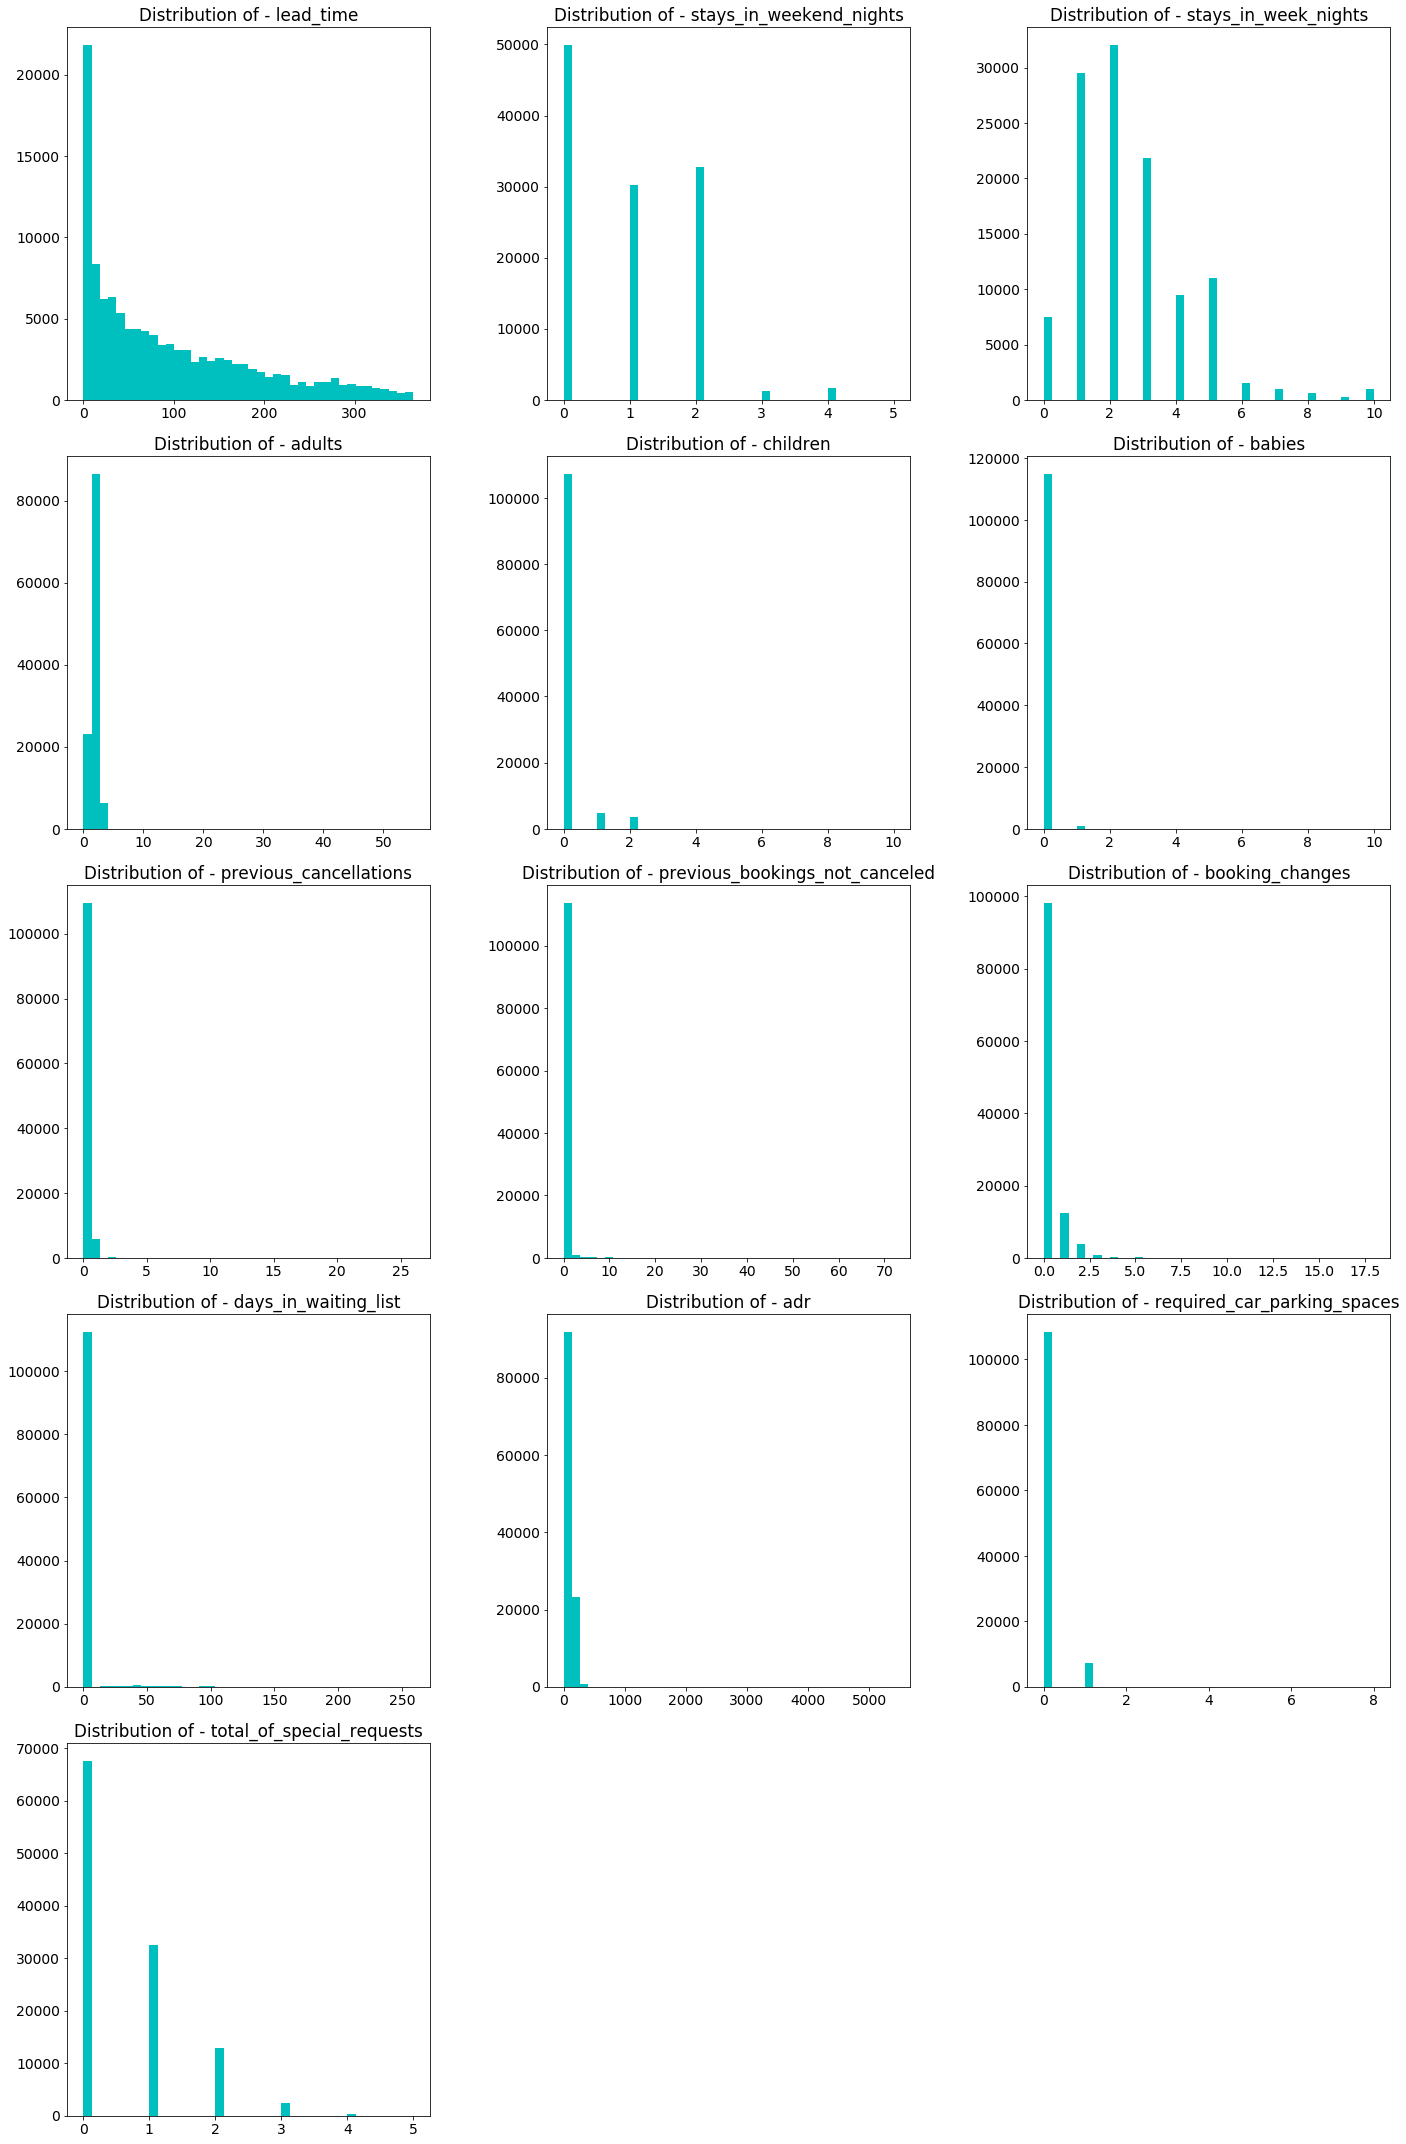

In [22]:
sns.set_palette("muted")

#create a list of the numeric variables
bookings_num = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies', 
                'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
                'adr', 'required_car_parking_spaces', 'total_of_special_requests']

#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1

#plot a histogram for each of our numeric variables
for k in bookings_num :   
    plt.subplot(5,3,j) 
    plt.hist(bookings_no_outliers[k], bins=40, color='c')
    plt.title('Distribution of - {}'.format(k))
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the above graphs it is evident that for the variables where we removed outliers, the range of data is much smaller.

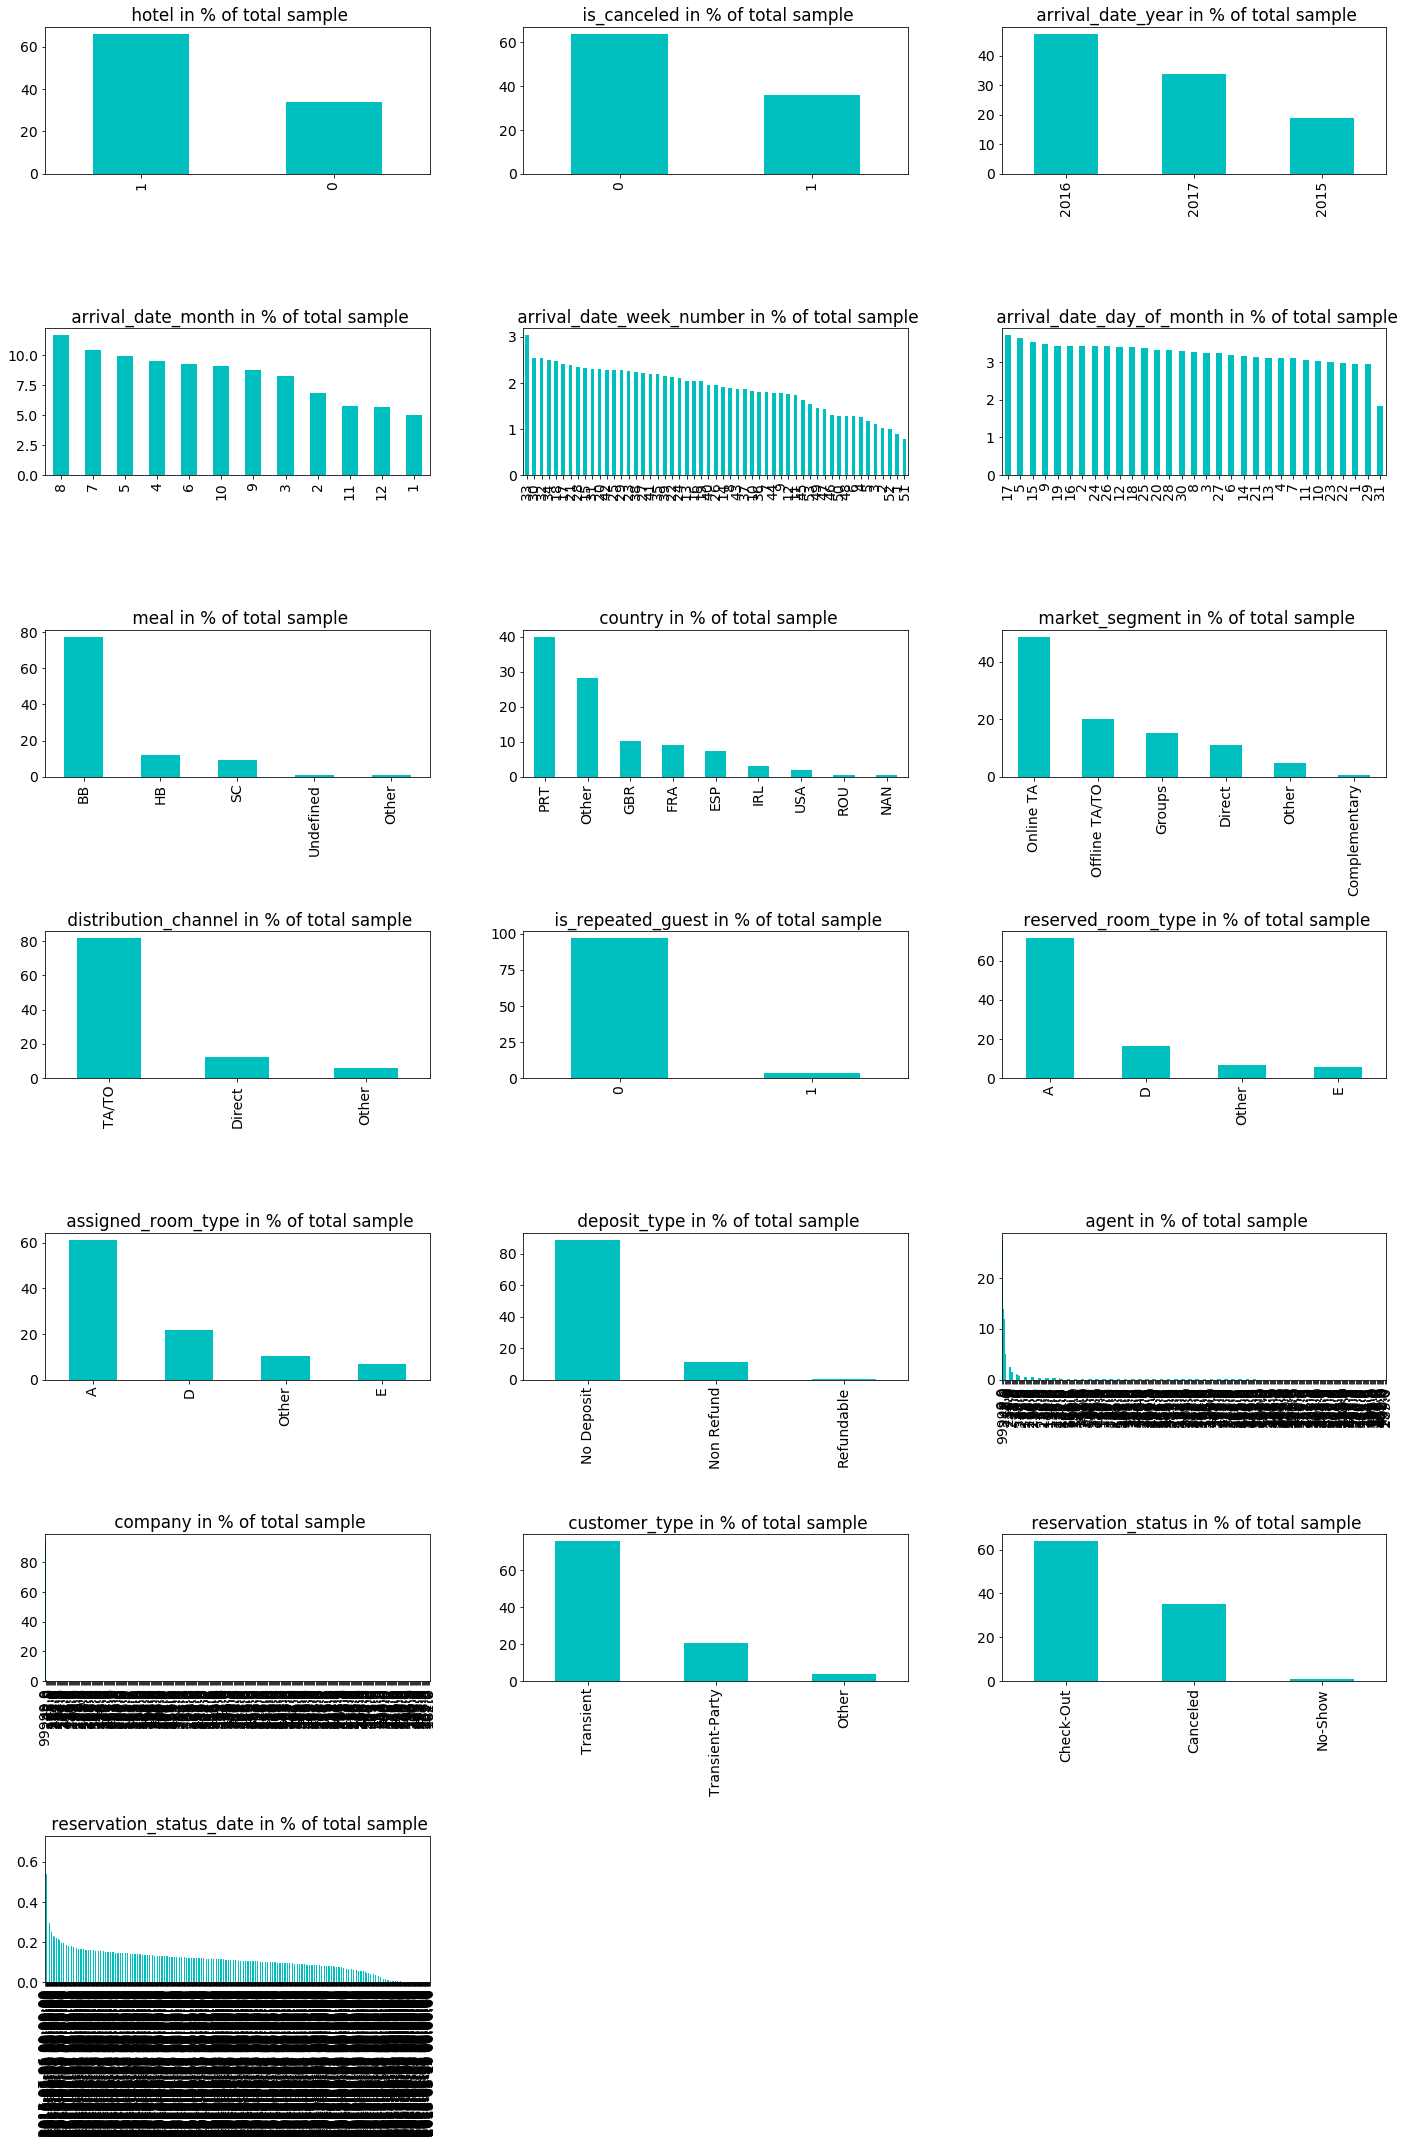

In [21]:
#set plot parameters
plt.rcParams.update({'font.size': 14,'figure.figsize':(20,30)}) 

#create a list of the categorical variables
bookings_cat = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                'arrival_date_day_of_month', 'meal', 'country', 'market_segment', 'distribution_channel', 
                'is_repeated_guest','reserved_room_type', 'assigned_room_type', 'deposit_type', 
                'agent', 'company', 'customer_type', 'reservation_status', 'reservation_status_date']

#use an index to identify the spot of the subplot
j=1
#plot a bar chart for each categorical variable, as % of total 
for k in bookings_cat:
    plt.subplot(7,3,j) 
    ((bookings_no_outliers[k].value_counts()/len(bookings_no_outliers[k]))*100).plot(kind='bar', color = 'c');
    plt.title(' {} in % of total sample'.format(k))
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

From the above visualizations we can see that for the variables where we grouped sparse classes, the graphs are now much easier to read and will likely generate much better results. For variables like agent, company, and reservation status date, I would likely recommend removing these before analysis unless there was a good reason not to, and I therefore left them largely unchanged. 

## Conclusions

While there are certainly more pre-processing steps that could have been taken, such as standardization, creating dummy variables, or using SMOTE, to name a few, my coursework in data science has led me to believe that these are methods that should only be used when you know which algorithm you will be using. Said differently, not all algorithms require standardization, nor do they all require dummy variables. So I choose to leave these pre-processing steps out of my work for this reason.  Similarly, depending on what the target variable was, and which columns you found to be best predictors, you could have removed further outliers. I chose to take a conservative approach on this as well. 